In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# read
X = pd.read_csv('X_NC.csv', header=None)
y = pd.read_csv('y_NC.csv', header=None)
X = X.to_numpy() 
y = y.to_numpy()

# delete all zero rows
zero_rows = np.where(~X.any(axis=1))[0]
X = np.delete(X, zero_rows, axis=0)
y = np.delete(y, zero_rows, axis=0)

# split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42, stratify=y_val)

# reshape
y_train = y_train.reshape(len(y_train),)
y_val = y_val.reshape(len(y_val),)
y_test = y_test.reshape(len(y_test),)

accuracy of train set: 0.6991404011461317
accuracy of test set: 0.7008547008547008
accuracy of test set: 0.6923076923076923


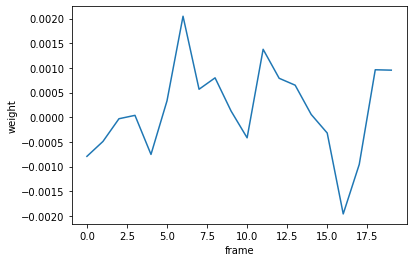

In [3]:
# train
logistic_regression = LogisticRegression(penalty='l2', C = 0.0001, random_state=0).fit(X_train, y_train)

w = logistic_regression.coef_
b = logistic_regression.intercept_

y_train_pred = logistic_regression.predict(X_train)
print("accuracy of train set: {}".format(1 - np.sum(np.abs(y_train_pred - y_train)) / y_train.shape[0]))

# val
y_val_pred = logistic_regression.predict(X_val)
print("accuracy of test set: {}".format(1 - np.sum(np.abs(y_val_pred - y_val)) / y_val.shape[0]))

# test
y_test_pred = logistic_regression.predict(X_test)
print("accuracy of test set: {}".format(1 - np.sum(np.abs(y_test_pred - y_test)) / y_test.shape[0]))

# plot
w = w.reshape(np.size(w),)
plt.plot(w)
plt.xlabel('frame')
plt.ylabel('weight')
plt.savefig('w_l1.png')

There is a severe problem: If you just make all 1 for labels, then the accuracy if (0.8+0.5)/2 = 0.65.

To solve this, you must deal with the class-imbalance problem AND split label into up-label and down-label.